In [1]:
import os
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 300)
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import sys
sys.path.append(os.path.abspath('../'))

import warnings
warnings.filterwarnings("ignore")

from server2022.src.train_val import *
from server2022.src.model_features import *
from server2022.data.processed.prepare_data import *


OUTPUT_FILE = '../reports/1_year_binary_target.csv'

TARGET_DICT = {'1': 'binary_target', '2': 'target_more30days', '3': 'target_more90days'}
'''Choose target: 
    1 - binary_target
    2 - target_more30days
    3 - target_more90days
'''
TARGET_COL = TARGET_DICT['1'] # TARGET_DICT[input()]

In [2]:
model = CatBoostClassifier(iterations=2000,
                               depth=5, 
                               l2_leaf_reg=5, 
                               learning_rate=0.001, # 0.01433
                               loss_function='Logloss',
                               use_best_model=False,
                               eval_metric='AUC',
                               verbose=False,
                               class_weights=[1, 0.01], #0.0006
                               random_seed=RANDOM_STATE,
                              )

## No features

In [3]:
df = create_df_1year_known(add_growth=False, count_log_fin_vals=False, normalize_fin_columns=False, drop_zeros=False)

In [4]:
feat_gen = Feature_gen(-2, -1)
df = feat_gen.preprocessing_before_fitting(df, use_diff_features=False, use_ratio_features=False)

Target = binary_target
Fitting model <catboost.core.CatBoostClassifier object at 0x00000185F92BCC10> with threshold = 0.03832...


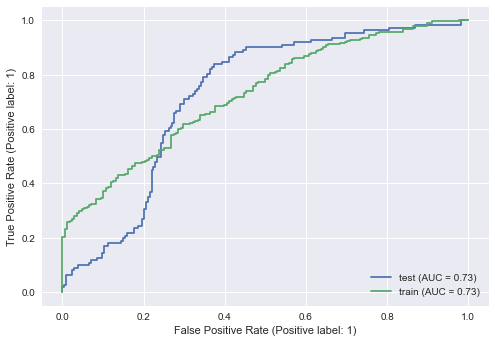

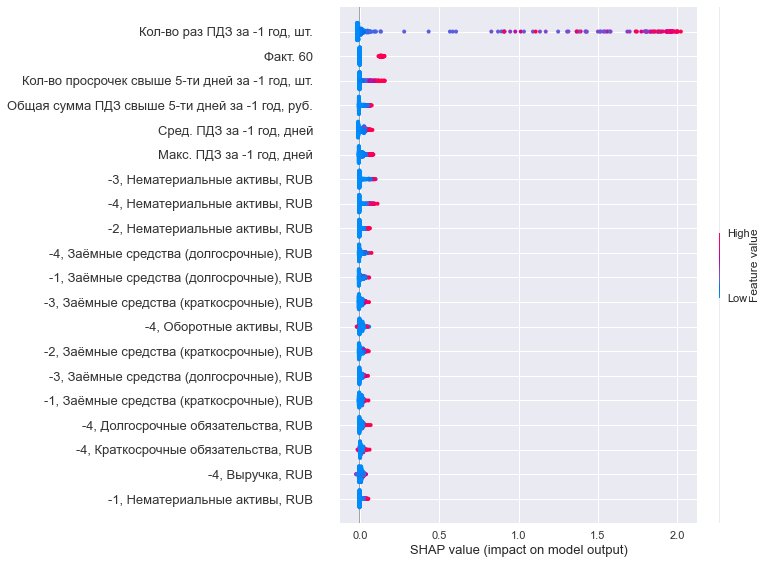


TRAIN: F1 = 0.639, Precision = 0.825, Recall = 0.521, Accuracy = 0.597, ROC_AUC = 0.729
TEST: F1 = 0.647, Precision = 0.505, Recall = 0.901, Accuracy = 0.665, ROC_AUC = 0.726



In [5]:
make_report_with_best_threshold(model, df, to_file=True, target_col=TARGET_COL, num_random_states=5,
                                file_path=OUTPUT_FILE, comment='no_features')

## drop_zeros=True

In [6]:
df = create_df_1year_known(add_growth=False, count_log_fin_vals=False, normalize_fin_columns=False, drop_zeros=True)

In [7]:
feat_gen = Feature_gen(-2, -1)
df = feat_gen.preprocessing_before_fitting(df, use_diff_features=False, use_ratio_features=False)

Target = binary_target
Fitting model <catboost.core.CatBoostClassifier object at 0x00000185F92BCC10> with threshold = 0.03971...


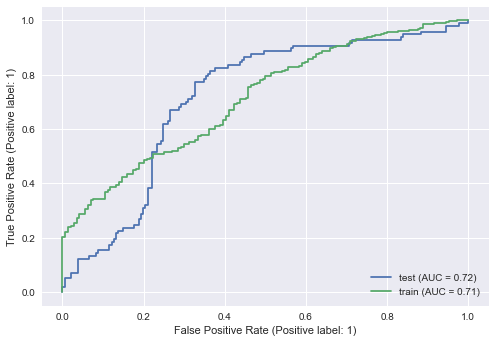

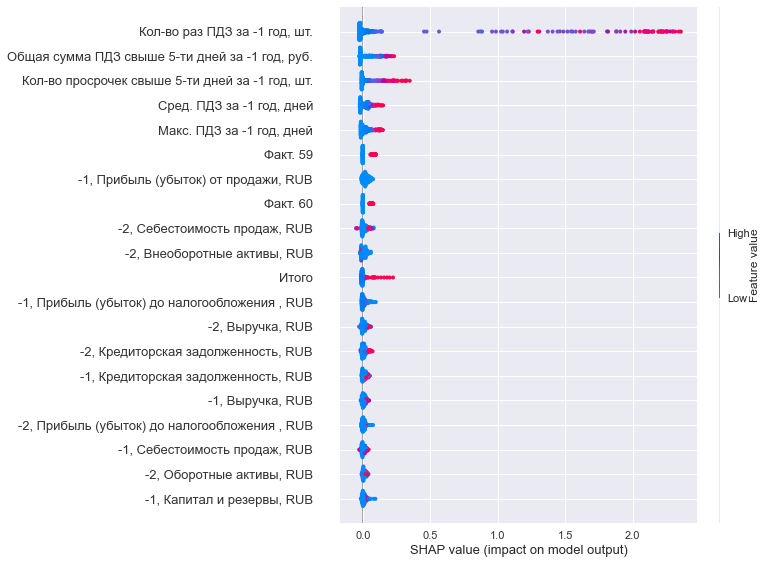


TRAIN: F1 = 0.587, Precision = 0.848, Recall = 0.449, Accuracy = 0.563, ROC_AUC = 0.712
TEST: F1 = 0.636, Precision = 0.503, Recall = 0.866, Accuracy = 0.655, ROC_AUC = 0.716



In [8]:
make_report_with_best_threshold(model, df, to_file=True, target_col=TARGET_COL, num_random_states=5,
                                file_path=OUTPUT_FILE, comment='drop_zeros=True')

## use_diff_features=True

In [9]:
df = create_df_1year_known(add_growth=False, count_log_fin_vals=False, normalize_fin_columns=False, drop_zeros=False)

In [10]:
feat_gen = Feature_gen(-2, -1)
df = feat_gen.preprocessing_before_fitting(df, use_diff_features=True, use_ratio_features=False)

Target = binary_target
Fitting model <catboost.core.CatBoostClassifier object at 0x00000185F92BCC10> with threshold = 0.03855...


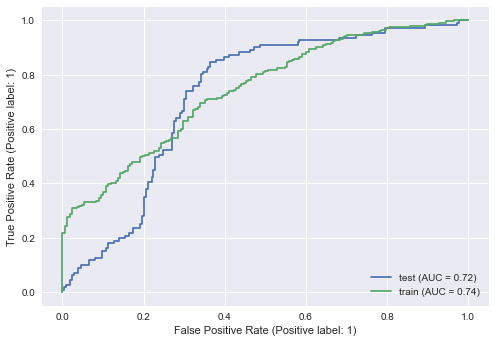

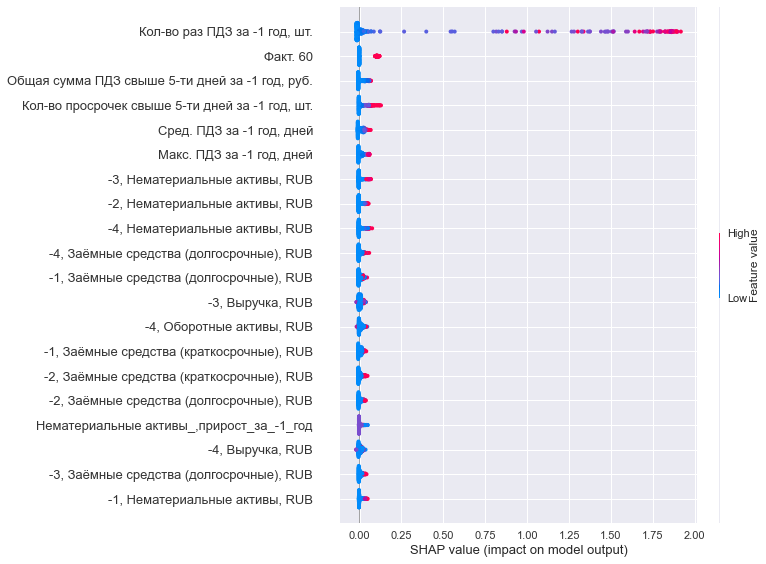


TRAIN: F1 = 0.647, Precision = 0.825, Recall = 0.532, Accuracy = 0.603, ROC_AUC = 0.743
TEST: F1 = 0.641, Precision = 0.5, Recall = 0.892, Accuracy = 0.658, ROC_AUC = 0.724



In [11]:
make_report_with_best_threshold(model, df, to_file=True, target_col=TARGET_COL, num_random_states=5,
                                file_path=OUTPUT_FILE, comment='use_diff_features=True')

## use_ratio_features=True

In [12]:
df = create_df_1year_known(add_growth=False, count_log_fin_vals=False, normalize_fin_columns=False, drop_zeros=False)

In [13]:
feat_gen = Feature_gen(-2, -1)
df = feat_gen.preprocessing_before_fitting(df, use_diff_features=False, use_ratio_features=True)

Target = binary_target
Fitting model <catboost.core.CatBoostClassifier object at 0x00000185F92BCC10> with threshold = 0.03962...


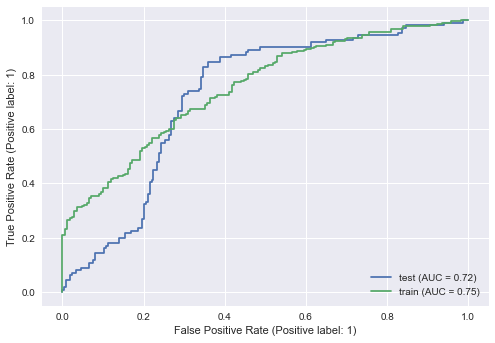

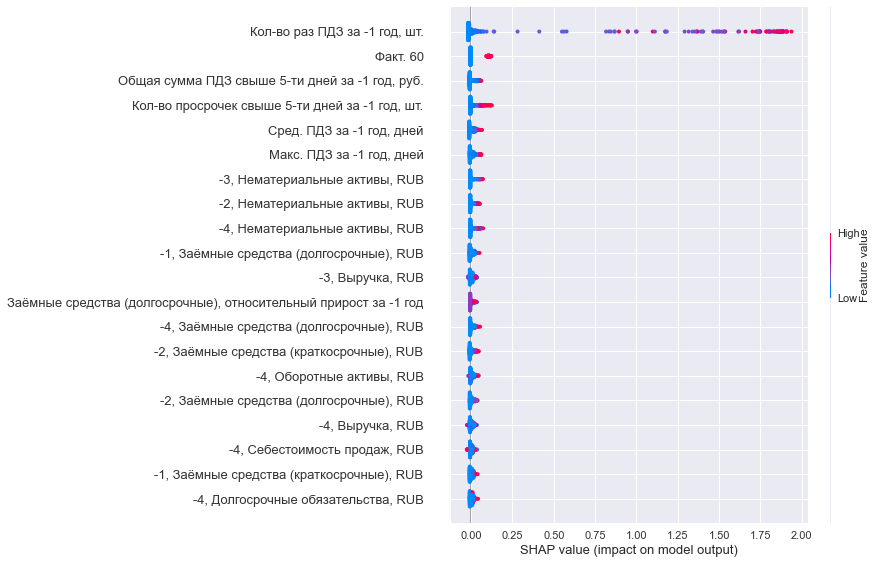


TRAIN: F1 = 0.636, Precision = 0.852, Recall = 0.507, Accuracy = 0.603, ROC_AUC = 0.751
TEST: F1 = 0.64, Precision = 0.505, Recall = 0.874, Accuracy = 0.665, ROC_AUC = 0.722



In [14]:
make_report_with_best_threshold(model, df, to_file=True, target_col=TARGET_COL, num_random_states=5,
                                file_path=OUTPUT_FILE, comment='use_ratio_features=True')

## add_growth=True

In [15]:
df = create_df_1year_known(add_growth=True, count_log_fin_vals=False, normalize_fin_columns=False, drop_zeros=False)

In [16]:
feat_gen = Feature_gen(-2, -1)
df = feat_gen.preprocessing_before_fitting(df, use_diff_features=False, use_ratio_features=False)

Target = binary_target
Fitting model <catboost.core.CatBoostClassifier object at 0x00000185F92BCC10> with threshold = 0.03985...


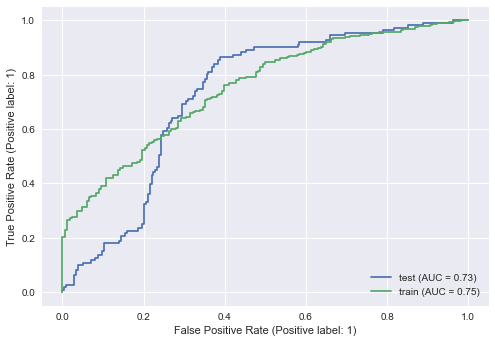

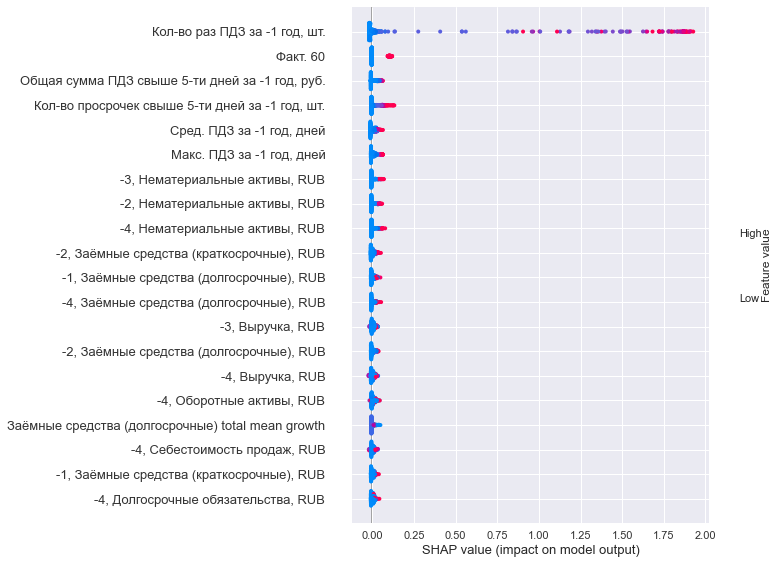


TRAIN: F1 = 0.634, Precision = 0.848, Recall = 0.507, Accuracy = 0.601, ROC_AUC = 0.751
TEST: F1 = 0.647, Precision = 0.513, Recall = 0.874, Accuracy = 0.674, ROC_AUC = 0.725



In [17]:
make_report_with_best_threshold(model, df, to_file=True, target_col=TARGET_COL, num_random_states=5,
                                file_path=OUTPUT_FILE, comment='add_growth=True')

## count_log_fin_vals=True

In [18]:
df = create_df_1year_known(add_growth=False, count_log_fin_vals=True, normalize_fin_columns=False, drop_zeros=False)

In [19]:
feat_gen = Feature_gen(-2, -1)
df = feat_gen.preprocessing_before_fitting(df, use_diff_features=False, use_ratio_features=False)

Target = binary_target
Fitting model <catboost.core.CatBoostClassifier object at 0x00000185F92BCC10> with threshold = 0.03873...


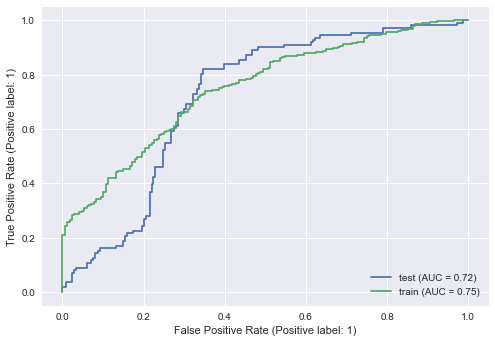

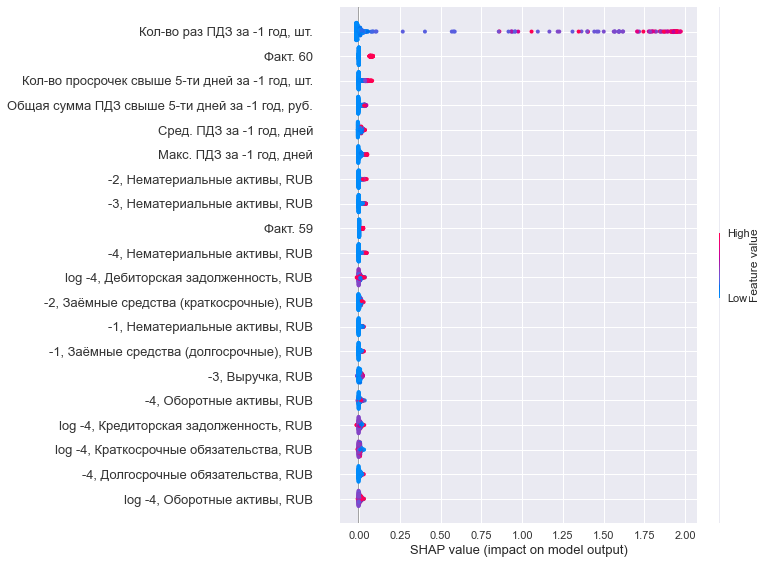


TRAIN: F1 = 0.645, Precision = 0.848, Recall = 0.521, Accuracy = 0.608, ROC_AUC = 0.749
TEST: F1 = 0.639, Precision = 0.497, Recall = 0.892, Accuracy = 0.655, ROC_AUC = 0.718



In [20]:
make_report_with_best_threshold(model, df, to_file=True, target_col=TARGET_COL, num_random_states=5,
                                file_path=OUTPUT_FILE, comment='count_log_fin_vals=True')

## normalize_fin_columns=True

In [21]:
df = create_df_1year_known(add_growth=False, count_log_fin_vals=False, normalize_fin_columns=True, drop_zeros=False)

In [22]:
feat_gen = Feature_gen(-2, -1)
df = feat_gen.preprocessing_before_fitting(df, use_diff_features=False, use_ratio_features=False)

Target = binary_target
Fitting model <catboost.core.CatBoostClassifier object at 0x00000185F92BCC10> with threshold = 0.0382...


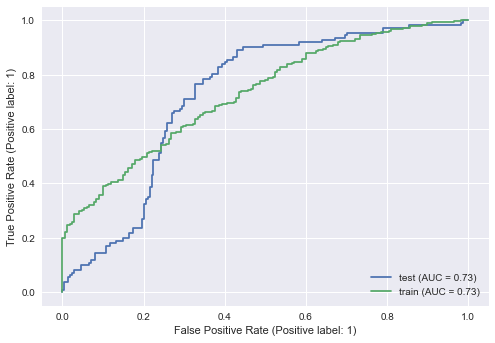

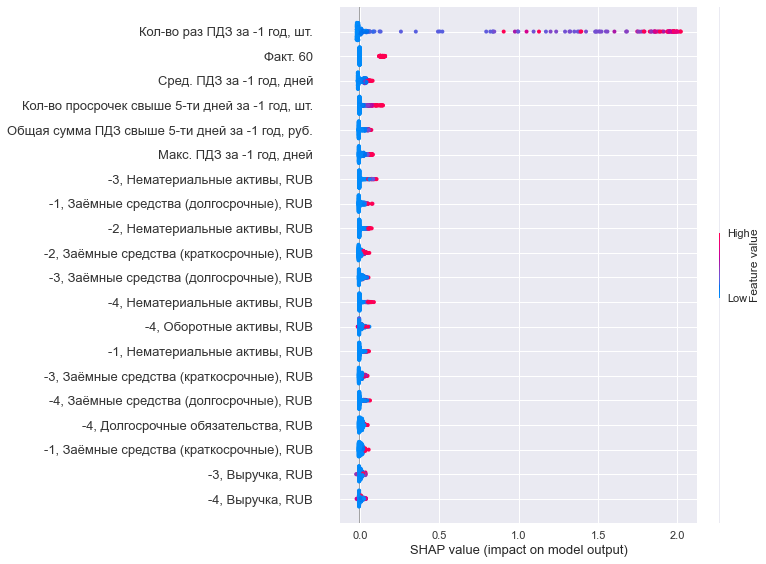


TRAIN: F1 = 0.647, Precision = 0.825, Recall = 0.532, Accuracy = 0.603, ROC_AUC = 0.73
TEST: F1 = 0.641, Precision = 0.498, Recall = 0.901, Accuracy = 0.655, ROC_AUC = 0.725



In [23]:
make_report_with_best_threshold(model, df, to_file=True, target_col=TARGET_COL, num_random_states=5,
                                file_path=OUTPUT_FILE, comment='normalize_fin_columns=True')

## All features

In [2]:
df = create_df_1year_known()

In [3]:
feat_gen = Feature_gen(-2, -1)
df = feat_gen.preprocessing_before_fitting(df)

Target = binary_target
Fitting model <catboost.core.CatBoostClassifier object at 0x000001AE1AB1C430> with threshold = 0.20448...


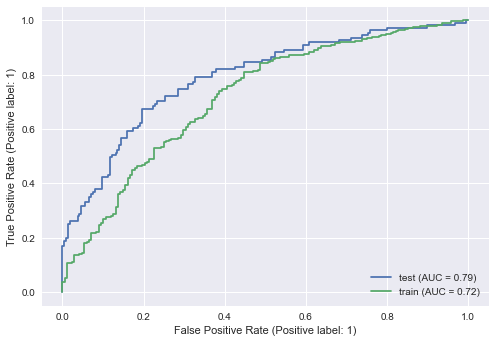

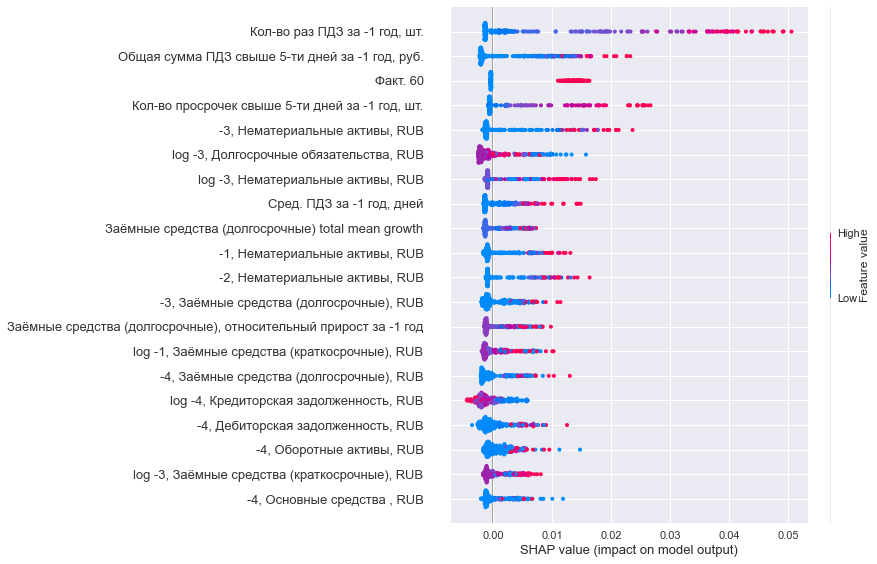


TRAIN: F1 = 0.547, Precision = 0.845, Recall = 0.405, Accuracy = 0.542, ROC_AUC = 0.718
TEST: F1 = 0.646, Precision = 0.559, Recall = 0.766, Accuracy = 0.714, ROC_AUC = 0.79



In [6]:
make_report_with_best_threshold(model, df, to_file=True, target_col=TARGET_COL, num_random_states=5,
                                file_path=OUTPUT_FILE, comment='All features')